## Matrix Factorization

- Try channel ratings dataset from Pin data or Infosys
- Averaging correct? 
- Encoding priors
- Clip every feature to range 
- Context aware recommender system SLIM / Asymetric matrix factorization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [4]:
# Probabilistic Matrix Factorization
class PMF():

    def __init__(self, learning_rate, latent_dim, regu_u, regu_i, num_user, num_item):

        self.learning_rate = learning_rate
        self.latent_dim = latent_dim

        self.regu_u = regu_u
        self.regu_i = regu_i

        self.U = 0.1 * np.random.randn(num_user, latent_dim)
        self.V = 0.1 * np.random.randn(num_item, latent_dim)

    def predict(self, user, item):
        return np.dot(self.U[user], self.V[item].T)

    def train(self, train, test, maxiter):

        rmse_errors = list()
        mae_errors = list()
        losses = list()
        i = 0
        pre_mae = 100000

        for i in range(maxiter):

            loss = 0.0
            for user in range(train.shape[1]):
                for item in range(train.shape[0]):
                    if train.iloc[item, user] > 0:

                        predicted_rating = self.predict(user, item)
                        error = train.iloc[item, user] - predicted_rating
                        loss += error ** 2

                        self.U[user] += self.learning_rate * (error * self.V[item] - self.regu_u * self.U[user])
                        self.V[item] += self.learning_rate * (error * self.U[user] - self.regu_i * self.V[item])

                        loss += self.regu_u * np.square(self.U[user]).mean() + self.regu_i * np.square(self.V[item]).mean()

            loss = 0.5 * loss / len(train)
            losses.append(loss)
            rmse, mae = self.eval_rmse(test)
            rmse_errors.append(rmse)
            mae_errors.append(mae)
            print(f'iter: {i} loss: {loss} rmse: {rmse} mae: {mae}')

            if pre_mae - mae < 0.01:
                break
            pre_mae = mae

        return i, losses, rmse_errors, mae_errors
    
    def eval_rmse(self, test):

        tmp_rmse = 0
        tmp_mae = 0
        k = 0

        for user in range(test.shape[1]):
            for item in range(test.shape[0]):
                if test.iloc[item, user] > 0:
                    k += 1
                    predict_rating = self.predict(user, item)
                    tmp_rmse += np.square(test.iloc[item, user] - predict_rating)
                    tmp_mae += np.abs(test.iloc[item, user] - predict_rating)

        rmse = np.sqrt(tmp_rmse / k)
        mae = tmp_mae / k
        return rmse, mae

In [5]:
def plot(epochs, losses, rmse_errors, mae_errors):

    plt.figure()
    plt.plot(np.arange(epochs), losses, rmse_errors, mae_errors)
    plt.legend(['loss', 'rmse', 'mae'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Losses')
    plt.savefig('Train_Evo.png')

1508 2071
iter: 0 loss: 60.12278310850035 rmse: 3.0615551387407853 mae: 2.9178759104790677
iter: 1 loss: 23.60056057077349 rmse: 2.971173555788856 mae: 2.813898567739251
iter: 2 loss: 18.12305875707197 rmse: 2.8921163974124613 mae: 2.7136285923262946
iter: 3 loss: 15.627948894192706 rmse: 2.8243032701048976 mae: 2.626548869454085
iter: 4 loss: 13.478760759729559 rmse: 2.759389664999779 mae: 2.5490020514321987
iter: 5 loss: 11.535322700641153 rmse: 2.694812749529572 mae: 2.4765586059872766
iter: 6 loss: 9.818689358937771 rmse: 2.632955388679719 mae: 2.408448865564919
iter: 7 loss: 8.355172198363015 rmse: 2.5765896239036232 mae: 2.3464287982106704
iter: 8 loss: 7.135049927846097 rmse: 2.526944294419324 mae: 2.2920018749005955
iter: 9 loss: 6.125589644738107 rmse: 2.483985650402089 mae: 2.245265520317609
iter: 10 loss: 5.289810915874834 rmse: 2.447086579028151 mae: 2.205500418024979
iter: 11 loss: 4.59396420570577 rmse: 2.415421927163851 mae: 2.1717474787848
iter: 12 loss: 4.0100971832452

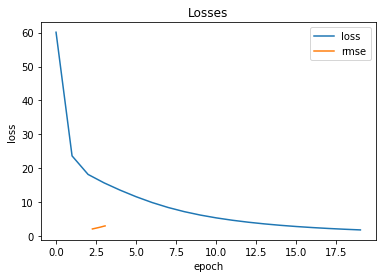

In [8]:
train = pd.read_csv('D:/Pycharm_Project/data/filmtrust/train.csv', header=0, index_col=[0])
test = pd.read_csv('D:/Pycharm_Project/data/filmtrust/test.csv', header=0, index_col=[0])
num_user = train.shape[1]
num_item = train.shape[0] + test.shape[0]
print(num_user, num_item)

pmf = PMF(learning_rate=0.01, latent_dim=50, regu_u=0.01, regu_i=0.01, num_user=num_user, num_item=num_item)
start = time.time()
i, losses, rmse_error, mae_error = pmf.train(train, test, 20)

print(f'Time elapsed: {time.time() - start}')
plot(i+1, losses, rmse_error, mae_error)